<a href="https://colab.research.google.com/github/figonrit/Proyectos/blob/main/Heart_attack_Prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Librerías y carga**

In [ ]:
!pip -q install numpy gensim scikit-learn
!pip install --upgrade scikit-learn

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
ruta_DS = 'gdrive/My Drive/Colab Notebooks/Prácticas/heart.xlsx'
DS = pd.read_excel(ruta_DS, sheet_name = 'heart')
DS

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
DS.columns = ['Age', 'Sex', 'Chest pain type','Resting Pressure','Chorestoral mg/dl', 'Fasting blood sugar','Resting ECG','Maximum heart rate','Exercise induced angina', 'Old Peak', 'Slope', 'Major Vessels', 'Thallium rate', 'output']


In [ ]:
DS.describe()

,Age,Sex,Chest pain type,Resting Pressure,Chorestoral mg/dl,Fasting blood sugar,Resting ECG,Maximum heart rate,Exercise induced angina,Old Peak,Slope,Major Vessels,Thallium rate,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
DS.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
Resting Pressure           0
Chorestoral mg/dl          0
Fasting blood sugar        0
Resting ECG                0
Maximum heart rate         0
Exercise induced angina    0
Old Peak                   0
Slope                      0
Major Vessels              0
Thallium rate              0
output                     0
dtype: int64

In [ ]:
DS[DS.duplicated() == True]

,Age,Sex,Chest pain type,Resting Pressure,Chorestoral mg/dl,Fasting blood sugar,Resting ECG,Maximum heart rate,Exercise induced angina,Old Peak,Slope,Major Vessels,Thallium rate,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
DS.drop_duplicates(inplace = True)

## **Separación de datos**

In [ ]:
y = DS['output']
del DS['output']
X = DS

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# **Entrenamiento y validación**

## Regresión logística (Statsmodel)

In [ ]:
import statsmodels.api as srm

result = srm.Logit(Y_train, X_train).fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.321451
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 output   No. Observations:                  211
Model:                          Logit   Df Residuals:                      198
Method:                           MLE   Df Model:                           12
Date:                Thu, 04 Apr 2024   Pseudo R-squ.:                  0.5315
Time:                        19:06:47   Log-Likelihood:                -67.826
converged:                       True   LL-Null:                       -144.77
Covariance Type:            nonrobust   LLR p-value:                 9.212e-27
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                         0.0367      0.024      1.531      0.126      -0.010   

Se elimina la variable "Resting ECG" al presentar un pvalue de 89.0% >5%, que demuestra que no es significativa en el modelo.

In [ ]:
X_train_reg = X_train[['Age','Sex','Chest pain type', 'Resting Pressure', 'Chorestoral mg/dl', 'Fasting blood sugar', 'Maximum heart rate', 'Exercise induced angina', 'Old Peak', 'Slope', 'Major Vessels', 'Thallium rate']]
X_test_reg = X_test[['Age','Sex','Chest pain type', 'Resting Pressure', 'Chorestoral mg/dl', 'Fasting blood sugar', 'Maximum heart rate', 'Exercise induced angina', 'Old Peak', 'Slope', 'Major Vessels', 'Thallium rate']]

In [ ]:
result = srm.Logit(Y_train, X_train_reg).fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.321496
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 output   No. Observations:                  211
Model:                          Logit   Df Residuals:                      199
Method:                           MLE   Df Model:                           11
Date:                Thu, 04 Apr 2024   Pseudo R-squ.:                  0.5314
Time:                        19:06:47   Log-Likelihood:                -67.836
converged:                       True   LL-Null:                       -144.77
Covariance Type:            nonrobust   LLR p-value:                 2.413e-27
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                         0.0367      0.024      1.532      0.125      -0.010   

Se elimina "Chorestoral mg/dl" por pvalue 48,2% > 5%

In [ ]:
X_train_reg = X_train[['Age','Sex','Chest pain type', 'Resting Pressure', 'Fasting blood sugar', 'Maximum heart rate', 'Exercise induced angina', 'Old Peak', 'Slope', 'Major Vessels', 'Thallium rate']]
X_test_reg = X_test[['Age','Sex','Chest pain type', 'Resting Pressure', 'Fasting blood sugar', 'Maximum heart rate', 'Exercise induced angina', 'Old Peak', 'Slope', 'Major Vessels', 'Thallium rate']]

In [ ]:
result = srm.Logit(Y_train, X_train_reg).fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.322640
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 output   No. Observations:                  211
Model:                          Logit   Df Residuals:                      200
Method:                           MLE   Df Model:                           10
Date:                Thu, 04 Apr 2024   Pseudo R-squ.:                  0.5298
Time:                        19:06:47   Log-Likelihood:                -68.077
converged:                       True   LL-Null:                       -144.77
Covariance Type:            nonrobust   LLR p-value:                 7.493e-28
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                         0.0313      0.022      1.407      0.159      -0.012   

Se elimina "Resting Pressure" por pvalue 23,9% > 5%.

In [ ]:
X_train_reg = X_train[['Age','Sex','Chest pain type', 'Fasting blood sugar', 'Maximum heart rate', 'Exercise induced angina', 'Old Peak', 'Slope', 'Major Vessels', 'Thallium rate']]
X_test_reg = X_test[['Age','Sex','Chest pain type', 'Fasting blood sugar', 'Maximum heart rate', 'Exercise induced angina', 'Old Peak', 'Slope', 'Major Vessels', 'Thallium rate']]

In [ ]:
result = srm.Logit(Y_train, X_train_reg).fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.325986
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 output   No. Observations:                  211
Model:                          Logit   Df Residuals:                      201
Method:                           MLE   Df Model:                            9
Date:                Thu, 04 Apr 2024   Pseudo R-squ.:                  0.5249
Time:                        19:06:47   Log-Likelihood:                -68.783
converged:                       True   LL-Null:                       -144.77
Covariance Type:            nonrobust   LLR p-value:                 3.440e-28
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Age                         0.0171      0.019      0.918      0.359      -0.019   

Se elimina "Age" por pvalue 35,9% > 5%

In [ ]:
X_train_reg = X_train[['Sex','Chest pain type', 'Fasting blood sugar', 'Maximum heart rate', 'Exercise induced angina', 'Old Peak', 'Slope', 'Major Vessels', 'Thallium rate']]
X_test_reg = X_test[['Sex','Chest pain type', 'Fasting blood sugar', 'Maximum heart rate', 'Exercise induced angina', 'Old Peak', 'Slope', 'Major Vessels', 'Thallium rate']]

In [ ]:
result = srm.Logit(Y_train, X_train_reg).fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.327996
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 output   No. Observations:                  211
Model:                          Logit   Df Residuals:                      202
Method:                           MLE   Df Model:                            8
Date:                Thu, 04 Apr 2024   Pseudo R-squ.:                  0.5219
Time:                        19:06:47   Log-Likelihood:                -69.207
converged:                       True   LL-Null:                       -144.77
Covariance Type:            nonrobust   LLR p-value:                 1.142e-28
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Sex                        -1.9723      0.537     -3.675      0.000      -3.024   

Se elimina "Fasting blood sugar" por pvalue 20,8% > 5%

In [ ]:
X_train_reg = X_train[['Sex','Chest pain type', 'Maximum heart rate', 'Exercise induced angina', 'Old Peak', 'Slope', 'Major Vessels', 'Thallium rate']]
X_test_reg = X_test[['Sex','Chest pain type', 'Maximum heart rate', 'Exercise induced angina', 'Old Peak', 'Slope', 'Major Vessels', 'Thallium rate']]

In [ ]:
result = srm.Logit(Y_train, X_train_reg).fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.331737
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 output   No. Observations:                  211
Model:                          Logit   Df Residuals:                      203
Method:                           MLE   Df Model:                            7
Date:                Thu, 04 Apr 2024   Pseudo R-squ.:                  0.5165
Time:                        19:06:47   Log-Likelihood:                -69.997
converged:                       True   LL-Null:                       -144.77
Covariance Type:            nonrobust   LLR p-value:                 5.057e-29
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Sex                        -2.0120      0.533     -3.778      0.000      -3.056   

Se elimina "Slope" por Pvalue 13,7% > 5%

In [ ]:
X_train_reg = X_train[['Sex','Chest pain type', 'Maximum heart rate', 'Exercise induced angina', 'Old Peak', 'Major Vessels', 'Thallium rate']]
X_test_reg = X_test[['Sex','Chest pain type', 'Maximum heart rate', 'Exercise induced angina', 'Old Peak', 'Major Vessels', 'Thallium rate']]

In [ ]:
result = srm.Logit(Y_train, X_train_reg).fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.337037
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 output   No. Observations:                  211
Model:                          Logit   Df Residuals:                      204
Method:                           MLE   Df Model:                            6
Date:                Thu, 04 Apr 2024   Pseudo R-squ.:                  0.5088
Time:                        19:06:47   Log-Likelihood:                -71.115
converged:                       True   LL-Null:                       -144.77
Covariance Type:            nonrobust   LLR p-value:                 2.866e-29
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Sex                        -1.9658      0.521     -3.776      0.000      -2.986   

Se elimina "Exercise induced angina" por pvalue 9,4% > 5%

In [ ]:
X_train_reg = X_train[['Sex','Chest pain type', 'Maximum heart rate', 'Old Peak', 'Major Vessels', 'Thallium rate']]
X_test_reg = X_test[['Sex','Chest pain type', 'Maximum heart rate', 'Old Peak', 'Major Vessels', 'Thallium rate']]

In [ ]:
result = srm.Logit(Y_train, X_train_reg).fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.343606
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 output   No. Observations:                  211
Model:                          Logit   Df Residuals:                      205
Method:                           MLE   Df Model:                            5
Date:                Thu, 04 Apr 2024   Pseudo R-squ.:                  0.4992
Time:                        19:06:48   Log-Likelihood:                -72.501
converged:                       True   LL-Null:                       -144.77
Covariance Type:            nonrobust   LLR p-value:                 1.941e-29
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Sex                   -2.0004      0.512     -3.905      0.000      -3.004      -0.996
Chest

## Regresión logística (Scikit-learn)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train_reg, Y_train)
pd.DataFrame(zip(X_train.columns, np.transpose(clf.coef_.tolist()[0])), columns=['features', 'coef'])

,features,coef
0,Age,-1.604042
1,Sex,0.729721
2,Chest pain type,0.024200
3,Resting Pressure,-0.947236
4,Chorestoral mg/dl,-0.878645
5,Fasting blood sugar,-0.883181


## Desempeño

Accuracy of Logistic Regression: 0.81


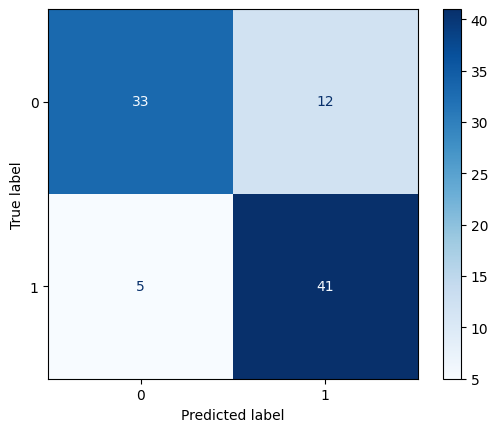

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

Y_pred_logit = clf.predict(X_test_reg)
Ac_reg = clf.score(X_test_reg, Y_test)
print('Accuracy of Logistic Regression: {:.2f}'.format(Ac_reg))

ConfusionMatrixDisplay.from_estimator(clf, X_test_reg, Y_test, values_format='.6g', cmap = 'Blues')
plt.show()

## Arbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
from pydot import graph_from_dot_data


arbol = DecisionTreeClassifier(criterion = 'entropy')

In [ ]:
arbol.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

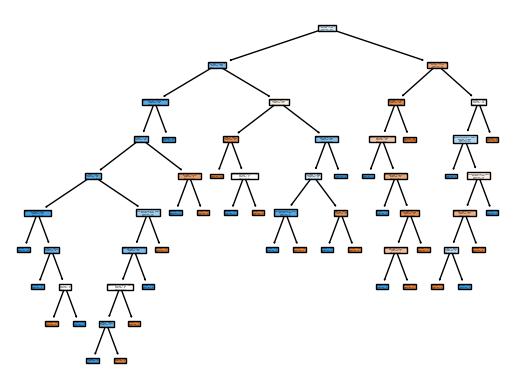

In [ ]:
from sklearn import tree

tree.plot_tree(arbol, feature_names = DS.columns, filled = True)
plt.show()

*   max_leaf_nodes: Número máximo de división del nodo.
*   max_depth: Profundidad máxima del árbol.

In [ ]:
parametros = {'max_leaf_nodes': [5,18,30], 'max_depth': [2,3,4]}

In [ ]:
from sklearn.model_selection import GridSearchCV

tree_cv = GridSearchCV(arbol, parametros, cv=10)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'max_depth': [2, 3, 4], 'max_leaf_nodes': [5, 18, 30]})

In [ ]:
print('Best params:')
print(tree_cv.best_params_)

Best params:
{'max_depth': 4, 'max_leaf_nodes': 18}


In [ ]:
arbol = DecisionTreeClassifier(criterion = 'entropy', max_depth= 4, max_leaf_nodes=18, min_samples_split=2)
arbol.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=18)

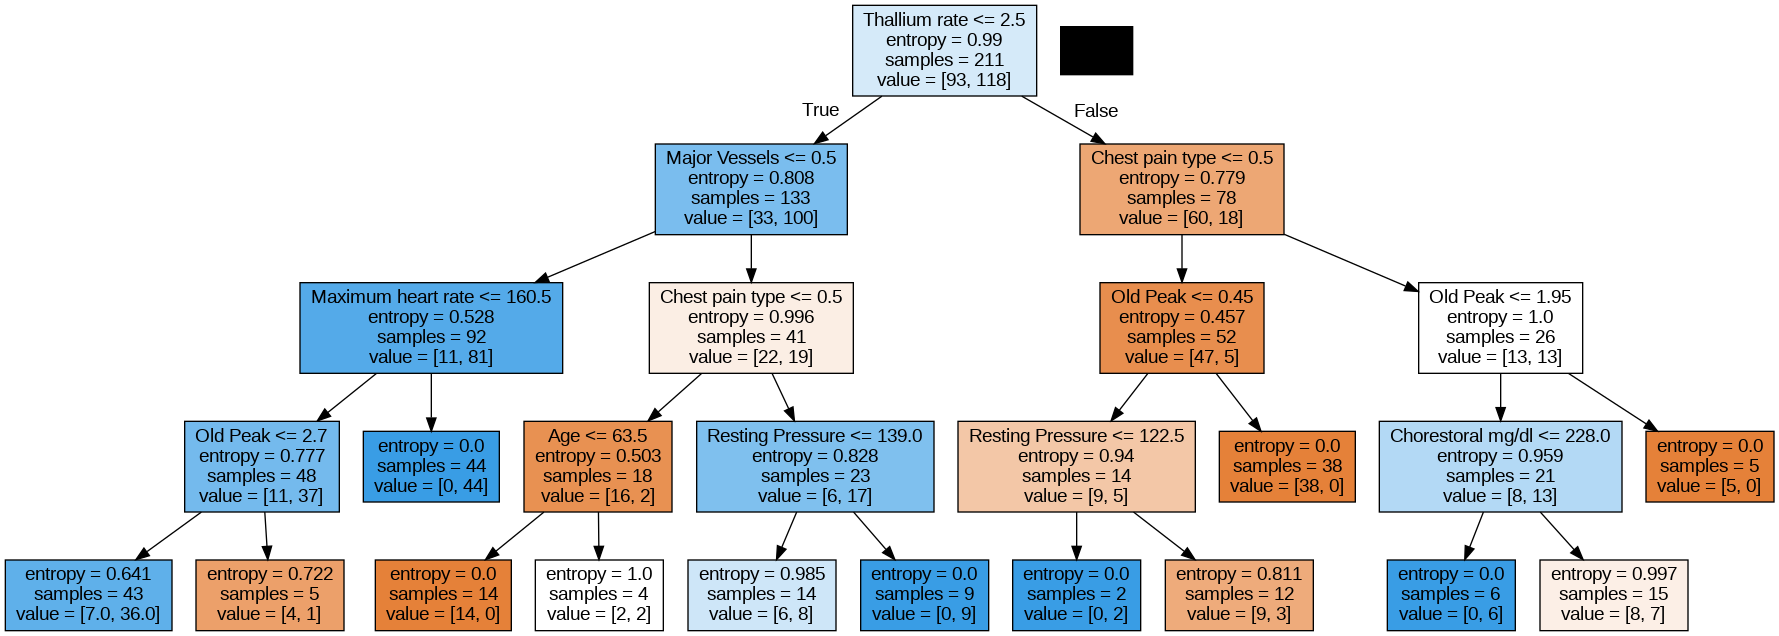

In [ ]:
dot_data = StringIO()
export_graphviz(arbol, out_file = dot_data, feature_names = DS.columns, filled = True )
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

**Dado que se hizo un Arbol de decision con algoritmo ID3, se eligirán aquellos nodos que reducen la entropía:**

*   Para un Ratio de talio <= 2, Cantidad de flujo sanguíneo = 0, Máximo ratio de corazón > 160.5, no se encuentra ningun paciente sin riesgo y 44 con riesgo

*   Para un Ratio de talio <= 2, Cantidad de flujo sanguíneo >= 1, Tipo de dolor de pecho = 0 y Edad <= 63, se encontraron 14 pacientes sin posibilidades de ataque al corazón y ninguno con posibilidades.

*   Para un Ratio de talio <= 2, Cantidad de flujo sanguíneo >= 1, Tipo de dolor de pecho >= 1, Presión en reposo > 139, no se encontraron pacientes con riesgos de ataque al corazón y 9 con posibilidades.

*   Para un Ratio de Talio = 3, Tipo de dolor de pecho = 0, Old Peak <= 0.45, Máxima relación cardiaca <= 117, no se obtuvieron pacientes sin riesgos y se encontraron 2 con riesgos.

*   Para un ratio de talio = 3, Tipo de dolor de pecho = 0, Old peak > 0.45, se encuentran 38 pacientes sin riesgo y ninguno con riesgo.

*   Para un Ratio de Talio = 3, Tipo de dolor de pecho >= 1, Old Peak <= 1.95, Colesterol <= 228 mg/dl, no se encontraron pacientes sin riesgo y se encontraron 6 con riesgo.

*   Para un ratio de talio = 3, Tipo de dolor de pecho >= 1, Old peak > 1.95, se encuentran 5 pacientes sin riesgo y ninguno con riesgo.

## Normalización

**Para los modelos a continuación es necesario realizarlos con la base de datos normalizada:**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer

scaler = MinMaxScaler()
scaler_data = scaler.fit(DS)
DS_scaled = pd.DataFrame(scaler_data.transform(DS), index = DS.index, columns = DS.columns)

In [ ]:
DS_scaled

,Age,Sex,Chest pain type,Resting Pressure,Chorestoral mg/dl,Fasting blood sugar,Resting ECG,Maximum heart rate,Exercise induced angina,Old Peak,Slope,Major Vessels,Thallium rate
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000


In [ ]:
X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled = train_test_split(DS_scaled, y, test_size=0.3, random_state=0)

## K-vecinos más cercanos

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, kneighbors_graph

KNN = KNeighborsClassifier()

Se definen los parámetros para hacer una grilla con validación cruzada y encontrar los parámetros del modelo de k-vecinos más cercanos que más se ajuste a los datos y entregue mejores resultados. Los parámetros a analizar son los siguientes:

*   n_neighbors: Número de vecinos.
*   metric: Metrica de distancia que se utiliza para el árbol (Euclidean: Distancia directa entre un punto y otro. Manhattan: Distancia efectiva (con movimientos horizontales y verticales)


In [ ]:
parametros = {'n_neighbors': [3, 5, 11, 19], 'metric':['euclidean', 'manhattan']}

In [ ]:
KNN_cv = GridSearchCV(KNN, parametros, cv=10)
KNN_cv.fit(X_train_scaled, Y_train_scaled)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19]})

In [ ]:
print('Best params for k-neighbors:')
print(KNN_cv.best_params_)

Best params for k-neighbors:
{'metric': 'manhattan', 'n_neighbors': 19}


In [ ]:
KNN = KNN_cv.best_estimator_

In [ ]:
grid_results = pd.DataFrame(KNN_cv.cv_results_)

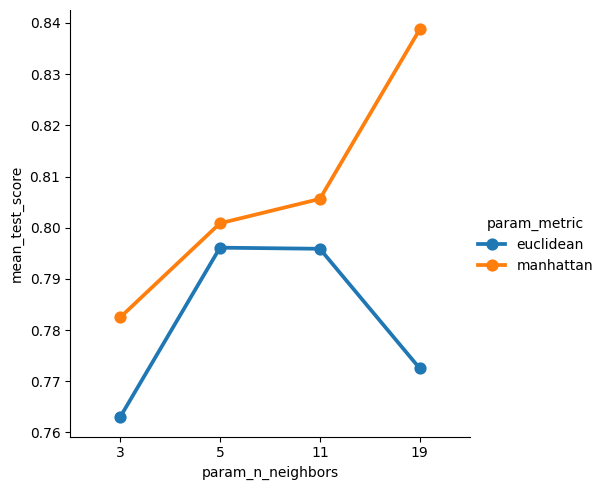

In [ ]:
import seaborn as sn

sn.catplot(x='param_n_neighbors', y='mean_test_score', kind = 'point', hue='param_metric', data=grid_results)

Los mejores resultados se obtienen aplicando la métrica Manhattan y con un 19 vecinos, obteniendo una media de puntaje de 84%.

## Random Forest

Los parámetros a analizar para este modelo son los siguientes:


*   n_estimators: Cantidad de árboles a realizar. Para este caso se fija en 100.
*   max_features: Cantidad de variables que se deben considerar al buscar la mejor división.
*   max_depth: Profundidad máxima del arbol.
*   criterion: Función para medir la calidad de la división. Los dos criterios admitidos son la impureza de Gini (gini) y la entropía (entropy).

Luego se realiza la grilla con cross validation para obtener los mejores parámetros y por último se grafican los puntajes obtenidos en ella.

Best params for Random Forest:
{'criterion': 'gini', 'max_depth': 4, 'max_features': 3}


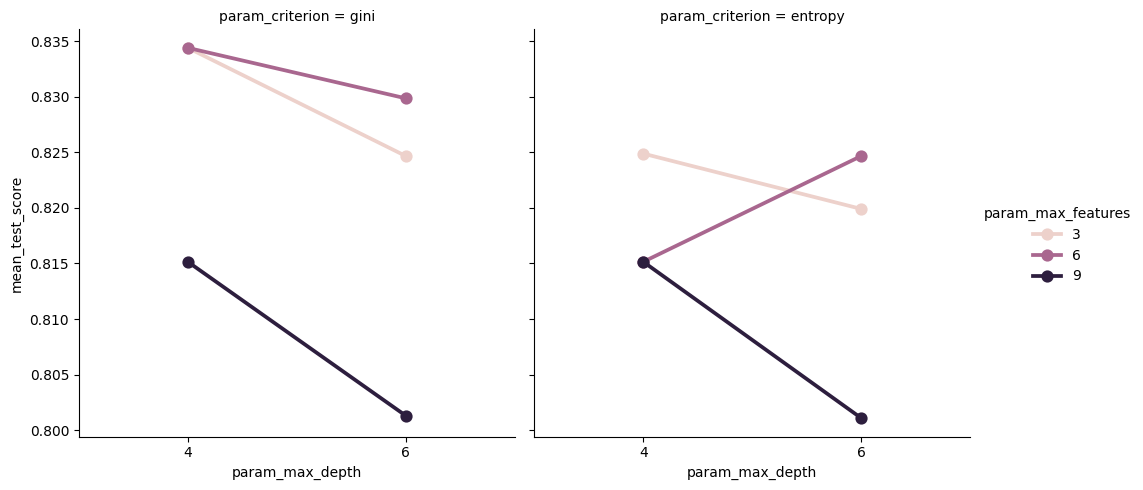

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 100)

parametros = { 'max_features': [3,6,9], 'max_depth': [4,6], 'criterion': ['gini','entropy']}
RF_cv = GridSearchCV(RF, parametros, cv=10)
RF_cv.fit(X_train_scaled, Y_train_scaled)

print('Best params for Random Forest:')
print(RF_cv.best_params_)

RF = RF_cv.best_estimator_

grid_results = pd.DataFrame(RF_cv.cv_results_)

sn.catplot(x='param_max_depth', y='mean_test_score', hue='param_max_features', kind = 'point', col = 'param_criterion', data = grid_results)



Los mejores resultados se obtienen utilizando el criterio "gini", profundidad máxima del árbol 4 y cantidad de variables máxima de 3, obteniendo un puntaje en torno a 85%.

## Evaluación

Se crea un data frame vacío para guardar los resultados de predicción de cada modelo y luego graficarlos. Columnas:

1. classifiers
2. False Positive Rate (fpr)
3. True Positive Rate (tpr)
4. AUC

In [ ]:
result_table = pd.DataFrame(columns = ['classifiers', 'FPR', 'TPR', 'AUC'])

### Regresión logística

In [ ]:
AC_reg = clf.score(X_test_reg, Y_test)
print('Accuracy of Logistic Regression: {:.2f}'.format(AC_reg))

Accuracy of Logistic Regression: 0.81


In [ ]:
Y_pred_regression = clf.predict(X_test_reg)

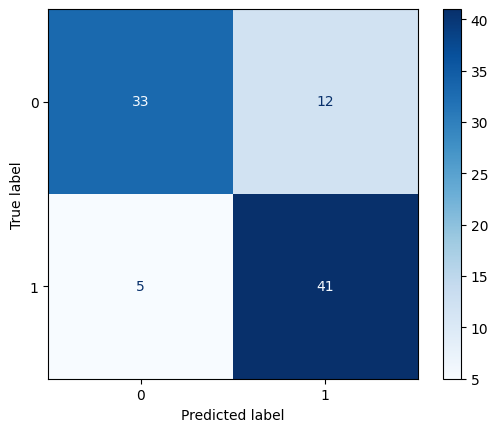

In [ ]:
ConfusionMatrixDisplay.from_estimator(clf, X_test_reg, Y_test, values_format='.6g', cmap = 'Blues')
plt.show()

El modelo de Regresión logística presenta una precisión de 81%.

Se logran acertar principalmente los pacientes con posibilidades de ataque cardiáco, con un 41 aciertos vs 12 errores. En el caso de los pacientes sin posibilidades, se logran acertar 33 vs 5 errores.

A continuación se obtiene el reporte de clasificación entre la variable objetivo de prueba y la variable objetivo de predicción

In [ ]:
from sklearn.metrics import make_scorer,roc_curve, auc,r2_score, roc_auc_score, classification_report, confusion_matrix

Report = classification_report(Y_test, Y_pred_regression)
print('Reporte de clasificación: ')
print(Report)

Reporte de clasificación: 
              precision    recall  f1-score   support

           0       0.87      0.73      0.80        45
           1       0.77      0.89      0.83        46

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91



En la tabla anterior, se observa de mejor manera que el porcentaje de precisión en la predicción de pacientes sin ataque cardiaco es de 87%, mientras que los con ataque cardiaco es 77%.

A continuación se determina el área bajo la curva(AUC):


In [ ]:
FPR, TPR, Thresholds = roc_curve(Y_test, clf.predict_proba(X_test_reg)[:,1])
AUC = roc_auc_score(Y_test, Y_pred_regression)
print('AUC: %.3f' % AUC)

AUC: 0.812


In [ ]:
#Se agregan los resultados obtenidos para graficar posteriormente las curvas ROC

#result_table = result_table.append({'classifiers': 'Logistic Regression', 'FPR':FPR, 'TPR':TPR, 'AUC': AUC}, ignore_index=True)

new_row = {'classifiers': 'Logistic Regression', 'FPR': FPR, 'TPR': TPR, 'AUC': AUC}
result_table = pd.concat([result_table, pd.DataFrame([new_row])], ignore_index=True)

### Árbol de decisión

Accuracy of Decision trees: 0.80


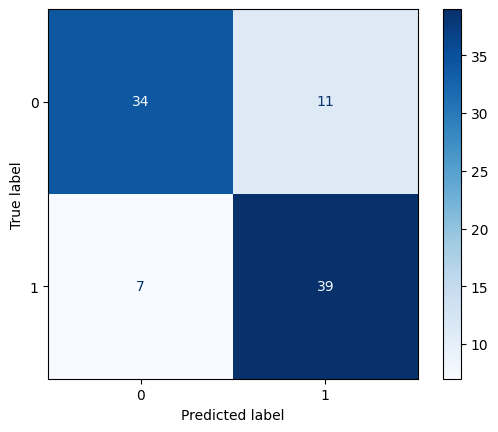

Reporte de clasificación: 
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        45
           1       0.78      0.85      0.81        46

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

AUC: 0.802


In [ ]:
AC_tree = arbol.score(X_test, Y_test)
print('Accuracy of Decision trees: {:.2f}'.format(AC_tree))

Y_pred_tree = arbol.predict(X_test)

ConfusionMatrixDisplay.from_estimator(arbol, X_test, Y_test, values_format='.6g', cmap = 'Blues')
plt.show()

Report = classification_report(Y_test, Y_pred_tree)
print('Reporte de clasificación: ')
print(Report)

FPR, TPR, thesholds = roc_curve(Y_test, arbol.predict_proba(X_test)[:,1])
AUC = roc_auc_score(Y_test, Y_pred_tree)
print('AUC: %.3f' % AUC)

#result_table = result_table.append({'classifiers': 'Árbol de decisión', 'FPR': FPR, 'TPR': TPR, 'AUC': AUC}, ignore_index = True)
new_row = {'classifiers': 'Árbol de decisión', 'FPR': FPR, 'TPR': TPR, 'AUC': AUC}
result_table = pd.concat([result_table, pd.DataFrame([new_row])], ignore_index=True)

Para árbol de decisión, se logran acertar correctamente 38 pacientes con ataque cardiaco y fallar en 9 (82% de efectividad). En el caso de los pacientes sin posibilidades de ataque cardiaco, se aciertan 36 vs 8 (81% de efectividad).

El modelo tiene una efectividad de 81%.

### K-Vecinos más cercanos

Accuracy of K-Nearest Neighbors: 0.79


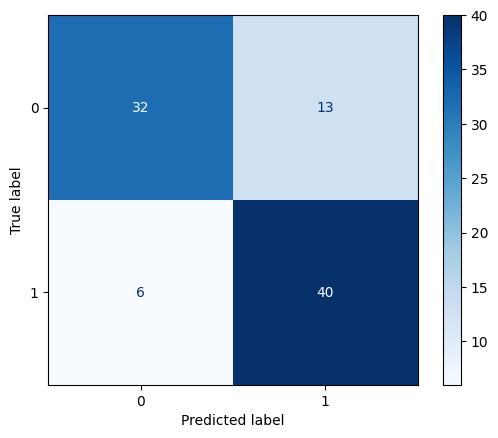

Reporte de clasificación: 
              precision    recall  f1-score   support

           0       0.84      0.71      0.77        45
           1       0.75      0.87      0.81        46

    accuracy                           0.79        91
   macro avg       0.80      0.79      0.79        91
weighted avg       0.80      0.79      0.79        91

AUC: 0.790


In [ ]:
AC_KNN = KNN.score(X_test_scaled, Y_test_scaled)
print('Accuracy of K-Nearest Neighbors: {:.2f}'.format(AC_KNN))

Y_pred_KNN = KNN.predict(X_test_scaled)

ConfusionMatrixDisplay.from_estimator(KNN, X_test_scaled, Y_test_scaled, values_format='.6g', cmap = 'Blues')
plt.show()

Report = classification_report(Y_test_scaled, Y_pred_KNN)
print('Reporte de clasificación: ')
print(Report)

FPR, TPR, thresholds = roc_curve(Y_test_scaled, KNN.predict_proba(X_test_scaled)[:,1])
AUC = roc_auc_score(Y_test_scaled, Y_pred_KNN)
print('AUC: %.3f' % AUC)

#result_table = result_table.append({'classifiers': 'K-Vecinos más cercanos', 'FPR':FPR, 'TPR':TPR, 'AUC':AUC}, ignore_index = True)
new_row = {'classifiers': 'K-Vecinos más cercanos', 'FPR': FPR, 'TPR': TPR, 'AUC': AUC}
result_table = pd.concat([result_table, pd.DataFrame([new_row])], ignore_index=True)

El modelo KNN logra predecir correctamente 40 pacientes con posibilidades de ataque cardiaco y fallar en 13 (75% de efectividad). Para pacientes sin posibilidades de ataque cardiaco, se aciertan 32 y fallan 6 (84% de efectividad)

El modelo tiene una precisión de 79%.

### Random Forest

Accuracy of Random Forest: 0.81


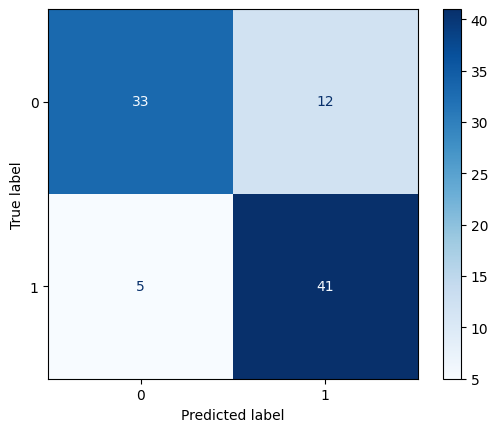

              precision    recall  f1-score   support

           0       0.87      0.73      0.80        45
           1       0.77      0.89      0.83        46

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

AUC: 0.812


In [ ]:
AC_RF = RF.score(X_test_scaled, Y_test_scaled)
print('Accuracy of Random Forest: {:.2f}'.format(AC_RF))

Y_pred_RF = RF.predict(X_test_scaled)

ConfusionMatrixDisplay.from_estimator(RF, X_test_scaled, Y_test_scaled, values_format='.6g', cmap = 'Blues')
plt.show()

Report = classification_report(Y_test_scaled, Y_pred_RF)
print(Report)

FPR, TPR, thresholds = roc_curve(Y_test_scaled, RF.predict_proba(X_test_scaled)[:,1])
AUC = roc_auc_score(Y_test_scaled, Y_pred_RF)
print('AUC: %.3f' % AUC)

#result_table = result_table.append({'classifiers': 'Random Forest', 'FPR':FPR, 'TPR':TPR, 'AUC':AUC}, ignore_index = True)
new_row = {'classifiers': 'Random Forest', 'FPR': FPR, 'TPR': TPR, 'AUC': AUC}
result_table = pd.concat([result_table, pd.DataFrame([new_row])], ignore_index=True)

Para Random Forest, se logran acertar 41 pacientes con posibilidades de ataque cardiaco y fallar en 12 (77% de efectividad). Para pacientes sin posibilidades de ataque cardiaco, se aciertan 33 y fallan 5 (86% de efectividad).

El modelo presenta una precisión de 81%.

### Curvas ROC

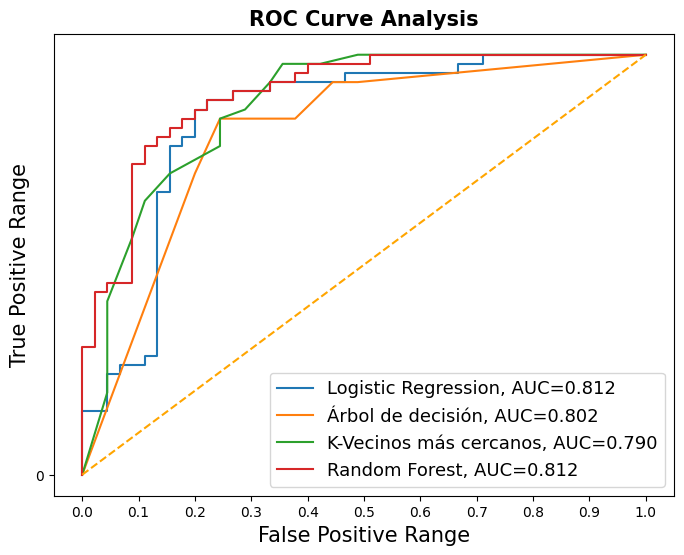

In [ ]:
result_table.set_index('classifiers', inplace = True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
  plt.plot(result_table.loc[i]['FPR'],
           result_table.loc[i]['TPR'],
           label = '{}, AUC={:.3f}'.format(i, result_table.loc[i]['AUC']))

plt.plot([0,1], [0,1], color= 'orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel('False Positive Range', fontsize=15)

plt.yticks(np.arange(0.0, 0.1, step=0.1))
plt.ylabel('True Positive Range', fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize = 15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

Todos los modelos predicen mejor que el azar (línea punteada).

Con este grafico se puede observar de mejor manera que el modelo con mejor desempeño es el de Random Forest, al presentar una mayor área bajo la curva (AUC).

# Guardado Modelo

In [ ]:
from joblib import dump, load

%cd /content
#Guardado Modelo
dump(RF, 'gdrive/My Drive/Colab Notebooks/Prácticas/ Heart Attack Trained Model.joblib')

/content


['gdrive/My Drive/Colab Notebooks/Prácticas/ Heart Attack Trained Model.joblib']

In [ ]:
ruta_data_set = 'gdrive/My Drive/Colab Notebooks/Prácticas/heart.xlsx'
DS = pd.read_excel(ruta_data_set, sheet_name = 'Test')

In [ ]:
modelo_entrenado = load('gdrive/My Drive/Colab Notebooks/Prácticas/ Heart Attack Trained Model.joblib')

In [ ]:
DS.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
dtype: int64

## Normalización

**Para los modelos a continuación es necesario realizarlos con la base de datos normalizada:**

In [ ]:
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer

scaler = MinMaxScaler()
scaler_data = scaler.fit(DS)
DS_scaled = pd.DataFrame(scaler_data.transform(DS), index = DS.index, columns = DS.columns)

In [ ]:
DS_scaled.columns = ['Age', 'Sex', 'Chest pain type','Resting Pressure','Chorestoral mg/dl', 'Fasting blood sugar','Resting ECG','Maximum heart rate','Exercise induced angina', 'Old Peak', 'Slope', 'Major Vessels', 'Thallium rate']


In [ ]:
prediccion = modelo_entrenado.predict(DS_scaled)

In [ ]:
print(prediccion)

[1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 1 0 1]


In [ ]:
prediccion.sum()/prediccion.size

0.84